- Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

-Построить точечный график

-Рассчитать коэффициенты корреляции Пирсона и Спирмена

-Построить модель линейной регрессии

-Рассчитать коэффициент детерминации

-Вывести график остатков

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/anastasiafedoracenko/Desktop/water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)
#удалили очевидно не нужный столбец

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


<AxesSubplot:title={'center':'Проверка выбросов'}>

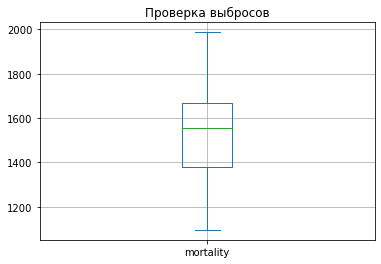

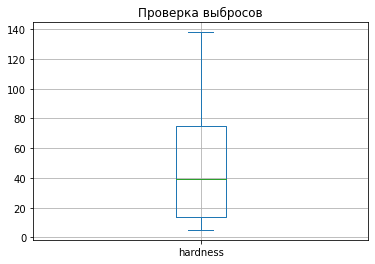

In [6]:
#Проверяем на наличие выбросов

df[['mortality']].plot( kind = 'box', grid = True, title = 'Проверка выбросов')
df[[ 'hardness']].plot( kind = 'box', grid = True, title = 'Проверка выбросов')

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

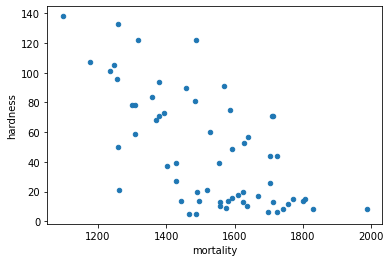

In [11]:
df.plot(kind = 'scatter', x = 'mortality', y = 'hardness')

#Видим, что в местах, где содержания кальция в воде меньше, там выше смертость и наоборот 
#В местах с высок содержанием кальция, люди более здоровые и показатели смертности ниже 

In [13]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [14]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


В обоих случаях видим обратную корреляционную зависимость, немного выше среднего

In [19]:
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [27]:
print(model.coef_)
print(model.intercept_)
# y = -3.13 * x - 1668

[-3.13167087]
1668.9722977277095


In [28]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

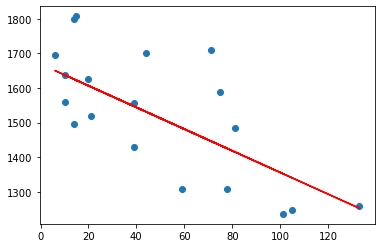

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = 'r')

In [30]:
model.score(X_test, y_test)
#коэффициент детерминации

0.5046490611017092

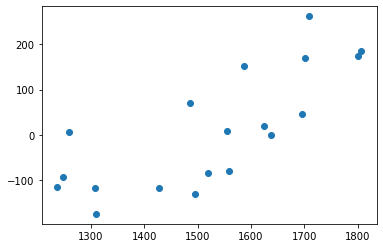

In [32]:
#выводим остатки 
err_x = y_test
err_y = y_test - y_pred
plt.scatter(err_x, err_y)

- Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
    
Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [34]:
north = df.copy()
south = df.copy()

north = north[(north['location'] == 'North')]
south = south[(south['location'] == 'South')]

<AxesSubplot:title={'center':'South'}, xlabel='mortality', ylabel='hardness'>

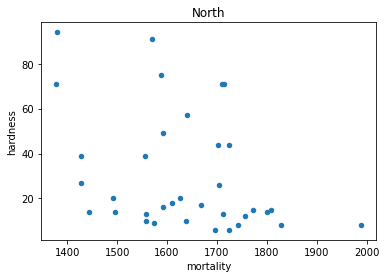

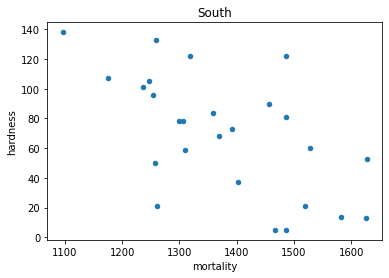

In [36]:
north.plot(kind = 'scatter', x = 'mortality', y = 'hardness', title = 'North')
south.plot(kind = 'scatter', x = 'mortality', y = 'hardness', title = 'South')

In [41]:
print(north[['mortality', 'hardness']].corr())
print(north[['mortality', 'hardness']].corr(method = 'spearman'))

           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000


In [42]:
print(south[['mortality', 'hardness']].corr())
print(south[['mortality', 'hardness']].corr(method = 'spearman'))

           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


юг коррелирует умеренно, север - слабо

In [45]:
x_north = north[['hardness']]
y_north = north['mortality']

x_north_train, x_north_test, y_north_train, y_north_test = train_test_split(x_north, y_north, test_size = 0.30, random_state = 42)

model_north = LinearRegression()
model_north.fit(x_north_train, y_north_train)

y_north_pred = model_north.predict(x_north_test)


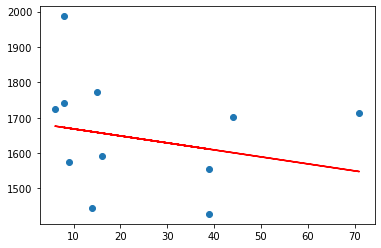

In [46]:
plt.scatter(x_north_test, y_north_test)
plt.plot(x_north_test, y_north_pred, c = 'r')

In [47]:
x_south = south[['hardness']]
y_south = south['mortality']

x_south_train, x_south_test, y_south_train, y_south_test = train_test_split(x_south, y_south, test_size = 0.30, random_state = 42)

model_south = LinearRegression()
model_south.fit(x_south_train, y_south_train)

y_south_pred = model_south.predict(x_south_test)


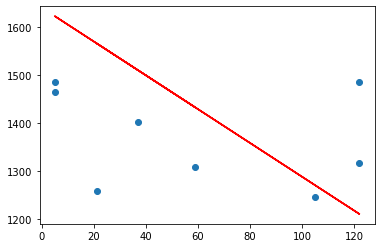

In [49]:
plt.scatter(x_south_test, y_south_test)
plt.plot(x_south_test, y_south_pred, c = 'r')

In [51]:
model.score(x_north_test, y_north_test)

-0.1903124043025357

In [52]:
model.score(x_south_test, y_south_test)

-3.0078243532565248

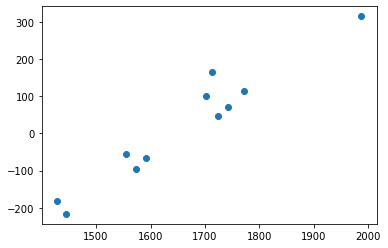

In [55]:
err_x_north = y_north_test
err_y_north = y_north_test - y_north_pred

plt.scatter(err_x_north, err_y_north)
#наблюдаем абсолютную отрицательную хаотичность на севере

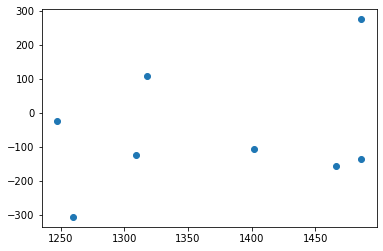

In [56]:
err_x_south = y_south_test
err_y_south = y_south_test - y_south_pred

plt.scatter(err_x_south, err_y_south)
#наблюдаем хаос остатков на юге